# Data Exploration, Model Building, Word2Vec, Recommender Systems

## Data Exploration (Text)
In this stage the corpus is explored to understand the common key words, content,
relationship, and presence and level of noise. This can be achieved by creating basic
statistics and embracing visualization techniques such as word frequency count, word
cooccurrence or correlation plot, etc.

### Frequency Chart
This visualization presents a bar chart whose length corresponds to the frequency a
particular word occurred

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer 

# Create a dictionary with key as file names and values as text for all files in a given folder
def CorpusFromDir(dir_path):
    result = dict(docs = [open(os.path.join(dir_path,f)).read() for f in os.listdir(dir_path)], ColNames = map(lambda x: x, os.listdir(dir_path)))
    return result


docs = CorpusFromDir('/content/drive/MyDrive/Colab Notebooks/text_files')

# Initialize
vectorizer = CountVectorizer()
doc_vec = vectorizer.fit_transform(docs.get('docs'))

#create dataFrame
df = pd.DataFrame(doc_vec.toarray().transpose(), index = vectorizer.get_feature_names())

# Change column headers to be file names
df.columns = docs.get('ColNames')
print (df)


             Doc_3.txt  Doc_1.txt  Doc_2.txt
analytics            0          1          1
and                  1          1          1
are                  0          1          1
books                1          0          0
domain               0          0          1
equally              0          1          0
for                  0          1          1
important            0          1          1
knowledge            0          0          1
like                 1          0          0
programming          0          1          0
reading              1          0          0
skills               0          2          1
statistics           0          1          1
travelling           1          0          0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tuple(docs.get('ColNames'))

()

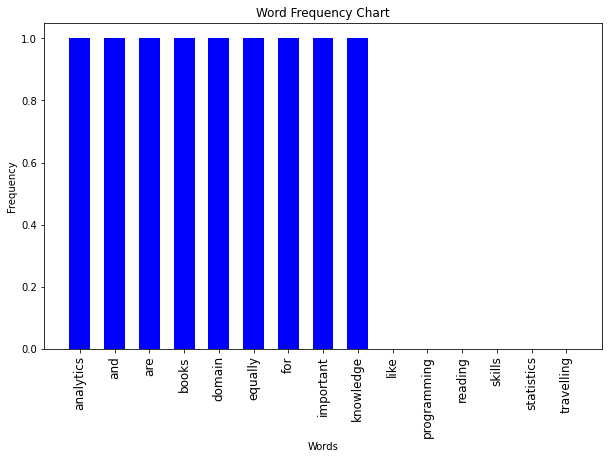

In [ ]:
# Example Code for Frequency Chart
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


words = df.index
freq = df.iloc[:,2].sort_values(ascending=False, inplace=False)

pos = np.arange(len(words))
width= 0.6

plt.figure(figsize = (10,6))
ax=plt.axes(frameon=True)
ax.set_xticks(pos)
ax.set_xticklabels(words, rotation='vertical', fontsize=12)
ax.set_title('Word Frequency Chart')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
plt.bar(pos, freq, width, color='b')
plt.show()

### Word Cloud
This is a visual representation of text data, which is helpful to get a high-level
understanding about the important keywords from data in terms of their occurrence.
The wordcloud package can be used to generate words whose font size relates to their
frequency

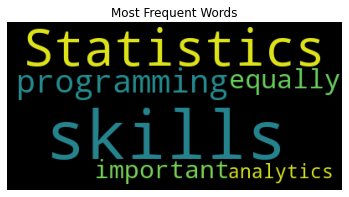

In [ ]:
from wordcloud import WordCloud

# Read the whole text.
text = open('/content/drive/MyDrive/Colab Notebooks/text_files/Doc_1.txt').read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

plt.imshow(wordcloud.recolor(random_state=2000))
plt.title('Most Frequent Words')
plt.axis("off")
plt.show()

Lexical Dispersion Plot

This plot is helpful to determine the location of a word in a sequence of text sentences.
On the x-axis you’ll have word offset numbers, and on the y-axis each row is a
representation of entire text and the marker indicates an instance of the word of interest 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[(0, 0), (1, 1), (2, 2), (4, 1), (7, 3), (11, 0), (12, 1), (13, 2), (17, 3)]


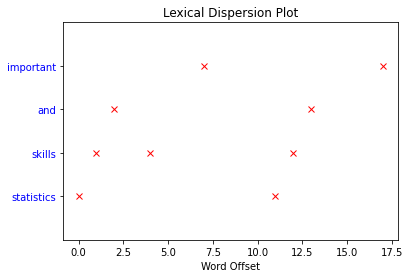

In [ ]:
' Example Code for Lexical Dispersion Plot'

import nltk
nltk.download('punkt')
from nltk import word_tokenize
import matplotlib.pyplot as plt

def dispersion_plot(text, words):
  words_token = word_tokenize(text)
  points = [(x,y) for x in range(len(words_token)) for y in range(len(words)) if words_token[x] == words[y]]
  print(points)
  if points:
    x,y=zip(*points)
  else:
    x=y=()
  plt.plot(x,y,"rx",scalex=.1)
  plt.yticks(range(len(words)),words,color="b")
  plt.ylim(-1,len(words))
  plt.title("Lexical Dispersion Plot")
  plt.xlabel("Word Offset")
  plt.show()
text = 'statistics skills and programming skills are equally important for analytics. statistics skills and domain knowledge are important for analytics'
dispersion_plot(text, ['statistics', 'skills', 'and', 'important'])

In [ ]:
a=word_tokenize(text)
a[11]

'statistics'

In [ ]:
len(text.split(' '))

19

Cooccurrence Matrix

Calculating the cooccurrence between words in a sequence of text will be helpful
matrices to explain the relationship between words.

In [ ]:
# Example Code for Cooccurrence Matrix
import statsmodels.api as sm
import scipy.sparse as sp
import sklearn
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
# default unigram model
count_model = CountVectorizer(ngram_range=(1,1))
docs_unigram = count_model.fit_transform(docs.get('docs'))

# co-occurrence matrix in sparse csr format
docs_unigram_matrix = (docs_unigram.T * docs_unigram)

# fill same word cooccurence to 0
docs_unigram_matrix.setdiag(0)


In [ ]:
docs_unigram_matrix

<15x15 sparse matrix of type '<class 'numpy.int64'>'
	with 137 stored elements in Compressed Sparse Column format>

In [ ]:
# co-occurrence matrix in sparse csr format
docs_unigram_matrix = (docs_unigram.T * docs_unigram) 
docs_unigram_matrix_diags = sp.diags(1./docs_unigram_matrix.diagonal())



# normalized co-occurence matrix
docs_unigram_matrix_norm = docs_unigram_matrix_diags * docs_unigram_matrix

In [ ]:
df

,Doc_3.txt,Doc_1.txt,Doc_2.txt
analytics,0,1,1
and,1,1,1
are,0,1,1
books,1,0,0
domain,0,0,1
equally,0,1,0
for,0,1,1
important,0,1,1
knowledge,0,0,1
like,1,0,0


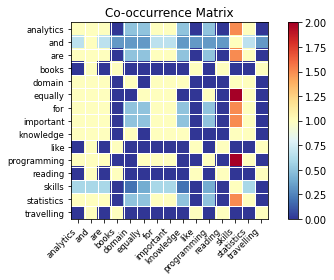

In [ ]:
# Convert to a dataframe
df = pd.DataFrame(docs_unigram_matrix_norm.todense(), index = count_model.get_feature_names())
df.columns = count_model.get_feature_names()

# Plot
sm.graphics.plot_corr(df, title='Co-occurrence Matrix', xnames=list(df.index))
plt.show()

In [ ]:
df.index


Index(['analytics', 'and', 'are', 'books', 'domain', 'equally', 'for',
       'important', 'knowledge', 'like', 'programming', 'reading', 'skills',
       'statistics', 'travelling'],
      dtype='object')

## Text Similarity

In [ ]:
docs = CorpusFromDir('/content/drive/MyDrive/Colab Notebooks/text_files')
#Example Code for Calculating Cosine Similarity for Documents
from sklearn.metrics.pairwise import cosine_similarity
print( "Similarity b/w doc 1 & 2: ", cosine_similarity([df['Doc_1.txt']], [df['Doc_2.txt']]))
print("Similarity b/w doc 1 & 3: ", cosine_similarity([df['Doc_1.txt']], [df['Doc_3.txt']]))
print("Similarity b/w doc 2 & 3: ", cosine_similarity([df['Doc_2.txt']], [df['Doc_3.txt']]))

Similarity b/w doc 1 & 2:  [[0.76980036]]
Similarity b/w doc 1 & 3:  [[0.12909944]]
Similarity b/w doc 2 & 3:  [[0.1490712]]


## Text Clustering

In [ ]:
#Example Code for Text Clustering
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import numpy as np
# load data and print topic names
newsgroups_train = fetch_20newsgroups(subset='train')
print(list(newsgroups_train.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


To keep it simple, let’s filter only three topics. Assume that we do not know the topics.
Let’s run the clustering algorithm and examine the keywords of each cluster

In [ ]:
categories = ['alt.atheism', 'comp.graphics', 'rec.motorcycles']
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=2017)
print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
labels = dataset.target
print("Extracting features from the dataset using a sparse vectorizer")
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(dataset.data)
print("n_samples: %d, n_features: %d" % X.shape)

2768 documents
3 categories
Extracting features from the dataset using a sparse vectorizer
n_samples: 2768, n_features: 35311


## Latent Semantic Analysis (LSA)

In [ ]:

# Example Code for LSA Through SVD
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

# Lets reduce the dimensionality to 2000
svd = TruncatedSVD(2000)
lsa = make_pipeline(svd, Normalizer(copy=False))
X = lsa.fit_transform(X)

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 95%


## k-means Clustering on SVD Dataset

In [ ]:
from __future__ import print_function
km = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1)
# Scikit learn provides MiniBatchKMeans to run k-means in batch mode suitable for a very large corpus

# km = MiniBatchKMeans(n_clusters=5, init='k-means++', n_init=1,init_size=1000, batch_size=1000)
print("Clustering sparse data with %s" % km)
km.fit(X)
print("Top terms per cluster:")

original_space_centroids = svd.inverse_transform(km.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(3):
  print("Cluster %d:" % i, end='')
  for ind in order_centroids[i, :10]:
    print(' %s' % terms[ind], end='')
  print()

Clustering sparse data with KMeans(max_iter=100, n_clusters=3, n_init=1)
Top terms per cluster:
Cluster 0: edu graphics image university lines subject organization thanks files file
Cluster 1: edu god keith com sgi livesey people caltech atheists writes
Cluster 2: com edu bike writes dod article ca organization subject lines


## Hierarchical Clustering on SVD Dataset


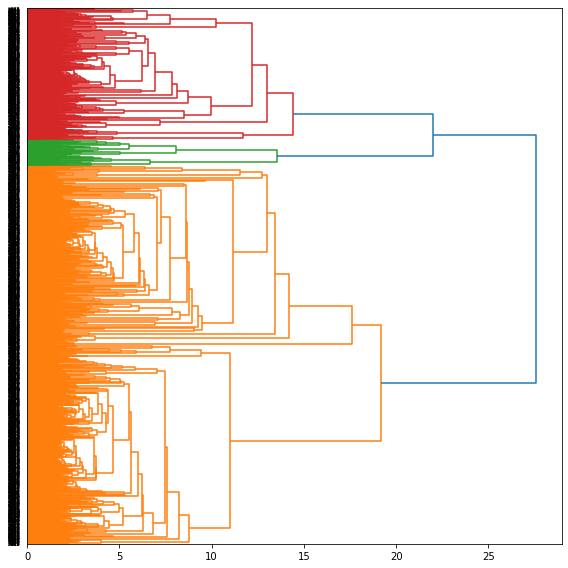

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances
fig, ax = plt.subplots(figsize=(8, 8)) # set size
ax = dendrogram(linkage_matrix, orientation="right")
plt.tick_params(axis= 'x', which='both')
plt.tight_layout() #show plot with tight layout
plt.show()

## Topic Modeling : Latent Dirichlet allocation (LDA)

In [ ]:
X = vectorizer.fit_transform(dataset.data)

# Example Code for LDA
from sklearn.decomposition import LatentDirichletAllocation
# continuing with the 20 newsgroup dataset and 3 topics
total_topics = 3
lda = LatentDirichletAllocation(n_components=total_topics, max_iter=100, learning_method='online', learning_offset=50., random_state=2017)
lda.fit(X)
feature_names = np.array(vectorizer.get_feature_names())

In [ ]:
for topic_idx, topic in enumerate(lda.components_):
 print("Topic #%d:" % topic_idx)
 print(" ".join([feature_names[i] for i in topic.argsort()[:-20 - 1:-1]]))

Topic #0:
edu com writes subject lines organization article posting university nntp host don like god uk ca just bike know graphics
Topic #1:
anl elliptical maier michael_maier qmgate separations imagesetter 5298 unscene appreshed linotronic l300 iici amnesia glued veiw halftone 708 252 dot
Topic #2:
hl7204 eehp22 raoul vrrend386 qedbbs choung qed daruwala ims kkt briarcliff kiat philabs col op_rows op_cols keeve 9327 lakewood gans


* Nonnegative Matrix Factorization


##Text Classification


In [ ]:
# Example Code Text Classification on 20 News Groups Dataset
categories = ['alt.atheism', 'comp.graphics', 'rec.motorcycles', 'sci.space', 'talk.politics.guns']
newsgroups_train = fetch_20newsgroups(subset='train',
categories=categories, shuffle=True, random_state=2017, remove=('headers','footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories,
shuffle=True, random_state=2017, remove=('headers', 'footers', 'quotes'))


y_train = newsgroups_train.target
y_test = newsgroups_test.target
vectorizer = TfidfVectorizer(sublinear_tf=True, smooth_idf = True, max_df=0.5, ngram_range=(1, 2), stop_words='english')
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
print("Train Dataset")
print("%d documents" % len(newsgroups_train.data))
print("%d categories" % len(newsgroups_train.target_names))
print("n_samples: %d, n_features: %d" % X_train.shape)
print("Test Dataset")
print("%d documents" % len(newsgroups_test.data))
print("%d categories" % len(newsgroups_test.target_names))
print("n_samples: %d, n_features: %d" % X_test.shape)

Train Dataset
2801 documents
5 categories
n_samples: 2801, n_features: 241036
Test Dataset
1864 documents
5 categories
n_samples: 1864, n_features: 241036


In [ ]:
# Example Code Text Classification Using Multinomial Naïve Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
clf = MultinomialNB()
clf = clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print ('Train accuracy_score: ', metrics.accuracy_score(y_train, y_train_pred))
print ('Test accuracy_score: ',metrics.accuracy_score(newsgroups_test.target, y_test_pred))
print ("Train Metrics: ", metrics.classification_report(y_train, y_train_pred))
print ("Test Metrics: ", metrics.classification_report(newsgroups_test.
target, y_test_pred))

Train accuracy_score:  0.9760799714387719
Test accuracy_score:  0.8320815450643777
Train Metrics:                precision    recall  f1-score   support

           0       1.00      0.97      0.98       480
           1       1.00      0.97      0.98       584
           2       0.91      1.00      0.95       598
           3       0.99      0.97      0.98       593
           4       1.00      0.97      0.99       546

    accuracy                           0.98      2801
   macro avg       0.98      0.98      0.98      2801
weighted avg       0.98      0.98      0.98      2801

Test Metrics:                precision    recall  f1-score   support

           0       0.91      0.62      0.74       319
           1       0.90      0.90      0.90       389
           2       0.81      0.90      0.86       398
           3       0.80      0.84      0.82       394
           4       0.78      0.86      0.82       364

    accuracy                           0.83      1864
   macro avg     

## Sentiment Analysis


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

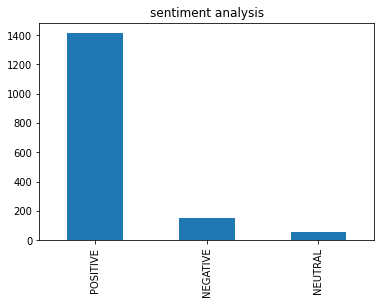

In [ ]:
# Example Code for Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of customer_review.csv')
SIA = SentimentIntensityAnalyzer()
data['polarity_score']=data.Review.apply(lambda x:SIA.polarity_scores(x)['compound'])
data['neutral_score']=data.Review.apply(lambda x:SIA.polarity_scores(x)['neu'])
data['negative_score']=data.Review.apply(lambda x:SIA.polarity_scores(x)['neg'])
data['positive_score']=data.Review.apply(lambda x:SIA.polarity_scores(x)['pos'])
data['sentiment']=''
data.loc[data.polarity_score>0,'sentiment']='POSITIVE'
data.loc[data.polarity_score==0,'sentiment']='NEUTRAL'
data.loc[data.polarity_score<0,'sentiment']='NEGATIVE'
data.head()
data.sentiment.value_counts().plot(kind='bar',title="sentiment analysis")
plt.show()


In [ ]:
data.head()

,ID,Review,polarity_score,neutral_score,negative_score,positive_score,sentiment
0,1,Excellent service my claim was dealt with very...,0.7346,0.618,0.000,0.382,POSITIVE
1,2,Very sympathetically dealt within all aspects ...,-0.8155,0.680,0.320,0.000,NEGATIVE
2,3,Having received yet another ludicrous quote fr...,0.9785,0.711,0.039,0.251,POSITIVE
3,4,Very prompt and fair handling of claim. A mino...,0.1440,0.651,0.135,0.214,POSITIVE
4,5,Very good and excellent value for money simple...,0.8610,0.485,0.000,0.515,POSITIVE


In [ ]:
pip install chunker


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for chunker: filename=chunker-1.1-py3-none-any.whl size=6980 sha256=58e999c5afad02c49e03210fe955fbe70a75c90675609bad9c32212ad231410e
  Stored in directory: /root/.cache/pip/wheels/27/23/cd/0755c658c130bd121bbdbb9e3cc2fd035484a2d3d912a4db1f
Successfully built chunker


In [41]:

# Example Code for Deep NLP
from chunker import PennTreebackChunker
from extractor import SOPExtractor
# Initialize chunker
chunker = PennTreebackChunker()
extractor = SOPExtractor(chunker)
# function to extract triples
def extract(sentence):
  sentence = sentence if sentence[-1] == '.' else sentence+'.'
  global extractor
  sop_triplet = extractor.extract(sentence)
  return sop_triplet
sentences = [
'The quick brown fox jumps over the lazy dog.',
'A rare black squirrel has become a regular visitor to a suburban garden',
'The driver did not change the flat tire',
"The driver crashed the bike white bumper"
]
#Loop over sentence and extract triples
for sentence in sentences:
  sop_triplet = extract(sentence)
  print(sop_triplet.subject + ':' + sop_triplet.predicate + ':' + sop_triplet.object)


ImportError: ignored